<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 60px; display: inline" alt="SizingLab" /></a>


# Scaling laws of electrical components

*Written by Marc Budinger, Aitor Ochotorena (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France.*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with electrical drone components characteristics.
Validation of the obtained scaling laws is achieved thanks to catalog data.  

The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) gives more details for components of electromechanical actuators:  
>*Budinger, M., Liscouët, J., Hospital, F., & Maré, J. C. (2012). Estimation models for the preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 226(3), 243-259.*  

**Notation**: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.

## Brushless motor

Multi-rotor drones use out runner brushless motors which are permanent magnet synchronous motors. The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) explains how to set up the scaling laws for this technology of component. 

![Brushless motor](./pictures/BrushlessMotor.jpg)

#### Scaling laws

The following table summarize the scaling laws which can be used for the brushless motors.

|                | Scaling laws  | References |
| -------------- | -------------------| -----------|
|  |                      |  AXI 2212/12        |
| Nominal torque |    $T_{nom}^*$     | $0.102$ N.m |
| Torque constant |$K^*$ | $1.02.10^{-2}$ N.m/A |
| Max torque | $T_{max}^*=T_{nom}^*$ | $0.198$ N.m |
| Friction torque | $T_{fr}^*=T_{nom}^{*3/3.5}$ | $5.88.10^{-3}$ N.m |
| Mass | $M^*=T_{nom}^{*3/3.5}$ | $57$ g |
| Resistance | $R^*=K^{*2}T_{nom}^{*-5/3.5}$ | $0.045$ ohm  |
| Inertia | $J^*=T_{nom}^{*-5/3.5}$ | $2.5.10^{-5}$ kg.m² |


In [31]:
# Motor reference data: AXI 2217/20 GOLD LINE
T_mot_ref = 0.102 # [N.m] motor nominal torque
M_mot_ref = 57e-3 # [kg] motor mass
R_mot_ref = 0.045 # [Ohm] motor resistance
K_mot_ref = 1.02e-2 # [N.m/A] Torque or fem constant

>**Question**: Explain how to find the mass scaling laws. Give the main assumptions and demonstrate the relationship.

## Validation with a data plot

We will compare the scaling law with a plot of the catalog data. 

#### Import data

The first step is to import catalog data stored in an excel file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [32]:
# Panda package importation
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_csv(path+'Motors_Data.csv', sep=';')
# Print the head (first lines of the file)
df.head()

,TYPE,Model,Kv_rpm_v,Pole (number),Io (A),r_omn,weight_g,Imax (A),No s,Voltage,...,Rend nom,Icc,I opt,Eta opt,Cf_Nm,Tmax_Nm,Estim -->,M*,R*,Cf*
0,AXI,AXI 2203/RACE GOLD LINE,2300,14,0.55,0.220,18.5,9.0,3.0,11.1,...,79.0,50.45,5.27,80.21,0.00228,0.037367,NaN,16.7090,0.2192,0.001665
1,AXI,AXI 2203/52 GOLD LINE,1525,14,0.40,0.390,18.5,7.0,2.0,7.4,...,66.0,18.97,2.75,73.07,0.00250,0.043833,NaN,19.1586,0.3970,0.001909
2,AXI,AXI 2203/40VPP GOLD LINE,2000,14,0.50,0.245,17.5,9.0,2.0,7.4,...,70.0,30.20,3.89,75.92,0.00239,0.042972,NaN,18.8355,0.2374,0.001877
3,AXI,AXI 2203/46 GOLD LINE,1720,14,0.50,0.285,18.5,8.5,2.0,7.4,...,68.0,25.96,3.60,74.17,0.00278,0.047191,NaN,20.4101,0.2808,0.002034
4,AXI,AXI 2204/54 GOLD LINE,1400,14,0.35,0.320,25.9,7.5,3.0,11.1,...,78.0,34.69,3.48,80.92,0.00239,0.051157,NaN,21.8716,0.3777,0.002179


### Validation of the scaling laws

In the next plot, we are going to validate the scaling laws of the motor mass ($M_{mot}^*=T_{mot}^{*3/3.5}$) and motor resistance ($R_{mot}^*=T_{mot}^{*-5/3.5}\cdot K_T^{*2}$) using the different models of the catalogue data.
Since we have different groups, we will use different references for the equations. In the first graph, the estimation model is displayed with the scatter data giving a good a approximation of the mass. 

For the representation of the motor resistance, we use a XY chart [(info)](https://support.ptc.com/cs/help/thingworx_hc/thingworx_7.0_hc/index.jspx?id=XYChartWidget&action=show) to display the estimation field against the references. If the model is appropriate, data will be concentrated on the equation Y=X.

For the plot, we use the [matplotlib](https://matplotlib.org/) package.

We define below, the different motor references used to validate the scaling laws:

In [33]:
# reference values for each model

#AXI 2212/12 GOLD LINE
M_mot_ref_AXI=57 #[g]
T_mot_ref_AXI=0.102#[Nm]
Cf_mot_ref_AXI= 0.00588 #[N.m]
R_mot_ref_AXI= 0.045 #[Ohms]
K_mot_ref_AXI=0.0049#[N.m/A]


#KDE5215XF-330

M_mot_ref_KDE=305 #[g]
T_mot_ref_KDE=1.794#[Nm]
Cf_mot_ref_KDE=0.020256 #[N.m]
R_mot_ref_KDE= 0.044 #[Ohms]
K_mot_ref_KDE=0.02893#[N.m/A]

# Scorpion SII-4035-330KV
M_mot_ref_SCO=435 #[g]
T_mot_ref_SCO=1.84#[Nm]
Cf_mot_ref_SCO=0.04080154 #[N.m]
R_mot_ref_SCO=0.031 #[Ohms]
K_mot_ref_SCO=0.02893726#[N.m/A]


Mass_Motors=[M_mot_ref_AXI,M_mot_ref_KDE,M_mot_ref_SCO]
T_Motors=[T_mot_ref_AXI,T_mot_ref_KDE,T_mot_ref_SCO]
Cf_motors=[Cf_mot_ref_AXI,Cf_mot_ref_KDE,Cf_mot_ref_SCO]
R_motors=[R_mot_ref_AXI,R_mot_ref_KDE,R_mot_ref_SCO]
K_motors=[K_mot_ref_AXI,K_mot_ref_KDE,K_mot_ref_SCO]

Tvector=[]
Mvector=[]
Cfvector=[]
Kvector=[]
Rvector=[]

$M_{mot}^*=T_{mot}^{*3/3.5}$

We validate the above scaling law using the motor models of *AXI motors*, *KDE Direct* and *SCORPION*.

In [34]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

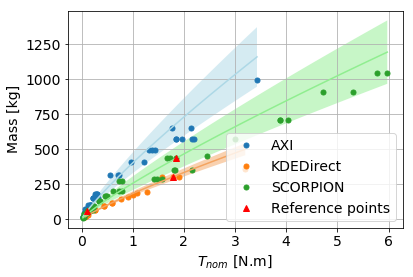

In [35]:
#validate from the data frame the following models
df=df[(df['TYPE'] == 'AXI') | (df['TYPE'] == 'KDEDirect') |(df['TYPE'] == 'SCORPION')]

#group the data by model/type

groups = df.groupby('TYPE')

Tvector=[]

color=['lightblue',  'sandybrown','lightgreen']

#scatter data using different color for each model
for name, group in groups:
    T=np.linspace(group.Tnom_Nm.min(),group.Tnom_Nm.max())
    Tvector.append(T)
    plt.plot(group.Tnom_Nm, group.weight_g, marker='o', linestyle='', ms=5, 
label=name)

i=0
#standard deviation from the reference
std=[0.1831,0.0854,0.1893]

#plot the scaling law with the standard deviation calculated for each model
for A,B,C in zip (Mass_Motors, T_Motors,Tvector):
    M=A*(C/B)**(3/3.5)
    plt.plot(C, M,color=color[i])    
    plt.fill_between(C, (1+std[i])*M, (1-std[i])*M, facecolor=color[i], alpha=0.5)
    i=i+1

#plot the reference point
plt.plot(T_Motors,Mass_Motors, '^r',label='Reference points')


#Here we plot
#Labelling
#ax1.loglog()

plt.grid(True,which="both",ls="-")# double grid 
plt.legend(fontsize=14)
plt.xlabel(r'$T_{nom}$ [N.m]', fontsize=14)
plt.ylabel('Mass [kg]', fontsize=14)

plt.tick_params(axis = 'both', labelsize = 14)

# plt.savefig('M_T.pdf',dpi=1200,format='pdf')

$R_{mot}^*=T_{mot}^{*-5/3.5}\cdot K_T^{*2}$

The use of a XY Chart will illustrate how good the estimation model match the data. If a good correlation is achieved, data will be concentrated on the equation X=Y: 

In [36]:
import pandas as pd
from matplotlib import pyplot as plt

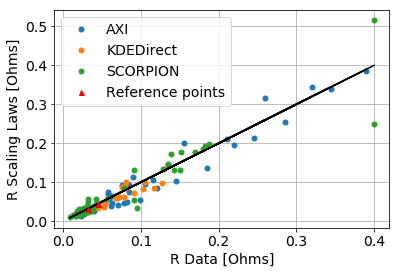

In [37]:

groups = df.groupby('TYPE')

#read pandas data

T2=df['Tnom_Nm'].values
K2=df['Kt_Nm_A'].values
R2=df['r_omn'].values


Pro=[]
R_Vector=[]
RES=[]
Name=[]

# save scaling laws values in a vector
for name, group in groups:
    Product=(group.Tnom_Nm)**(-5/3.5)*group.Kt_Nm_A**2
    Pro.append(Product)
    Name.append(name)


for A,B,C,D in zip (R_motors, T_Motors,K_motors,Pro):
    R=D*A/(B**(-5/3.5))/(C**2)
    R_Vector.append(R)

for name, group in groups:
    RES.append(group.r_omn)

i=0

for i in range(len(RES)):
        plt.plot(RES[i], R_Vector[i], marker='o', linestyle='', ms=5, 
    label=Name[i]) #plot the data by group
        plt.plot(RES[i], RES[i], '-k',label='_nolegend')#plot X=Y

plt.plot(R_motors,R_motors,'^r',label='Reference points',ms=5)#plot reference

        
plt.grid(True,which="both",ls="-")

#plt.loglog()
plt.legend(fontsize=14)
plt.xlabel('R Data [Ohms]', fontsize=14)
plt.ylabel('R Scaling Laws [Ohms]', fontsize=14)
plt.tick_params(axis = 'both', labelsize = 14)
#plt.savefig('RDataRSL.pdf',dpi=1200,format='pdf')
#mp.savefig('RDataRSL.pdf',dpi=1200,format='pdf')

## Filtering techniques

### Pareto frontier

The [Pareto frontier](https://fr.wikipedia.org/wiki/Optimum_de_Pareto) permits to highlight the most important points among a set of factors. Based on design criteria, we select such set of outputs which resources are most optimally used. In the next point, we define a function called **dominated** which returns a '0' if the point satisfy the optimal conditions required and an other number, on the contrary case.

In [38]:
# This function tests if a component is dominated
# return 0 if non dominated, the number of domination other else
# inputs :
# x_,y_ : the  component's characteristics to test
# X_,Y_ : the  data set characteristics

def dominated(x_,y_,X_,Y_):
    compteur=0
    for a,b in zip(X_,Y_):
        # a>x_ for high torque and  b<y_ for small weight
        if (a>x_) and (b<y_):
            compteur +=1
    return compteur

For the motors, a **high torque per weight** is desired. 
In the next part, we will highlight in red such points which dominate the rest. In other words, we find a set of data with the optimal characteristics concerning torque and weight. 

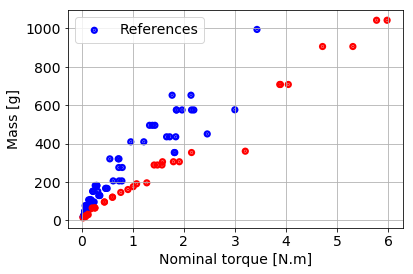

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df_mot=df
df_mot['Dominated']=0
# df_mot = df_mot.reset_index(drop=True)

for row in range(len(df_mot['Tnom_Nm'])):
    if dominated(df_mot.loc[row,'Tnom_Nm'], df_mot.loc[row,'weight_g'],df_mot['Tnom_Nm'].values,df_mot['weight_g'].values)>0:
        df_mot.loc[row,'Dominated']=1    

df_mot[df_mot['Dominated']==0].to_csv(r'./data/Non-Dominated-Motors.csv',sep=';')#We save the non-dominated series to process after.

color_wheel = {0: 'r', 
               1: 'b'} #we color in red the non-dominated series

colors = df_mot['Dominated'].map(lambda x: color_wheel.get(x))
plt.scatter(df['Tnom_Nm'], df['weight_g'], c=colors, s=5, linewidth=5,label='References')

plt.ylabel('Mass [g]')
plt.xlabel('Nominal torque [N.m]')
plt.legend()
plt.grid()
plt.show()

These dominated points can be visualized in a scatter matrix to see their effects in other variables.

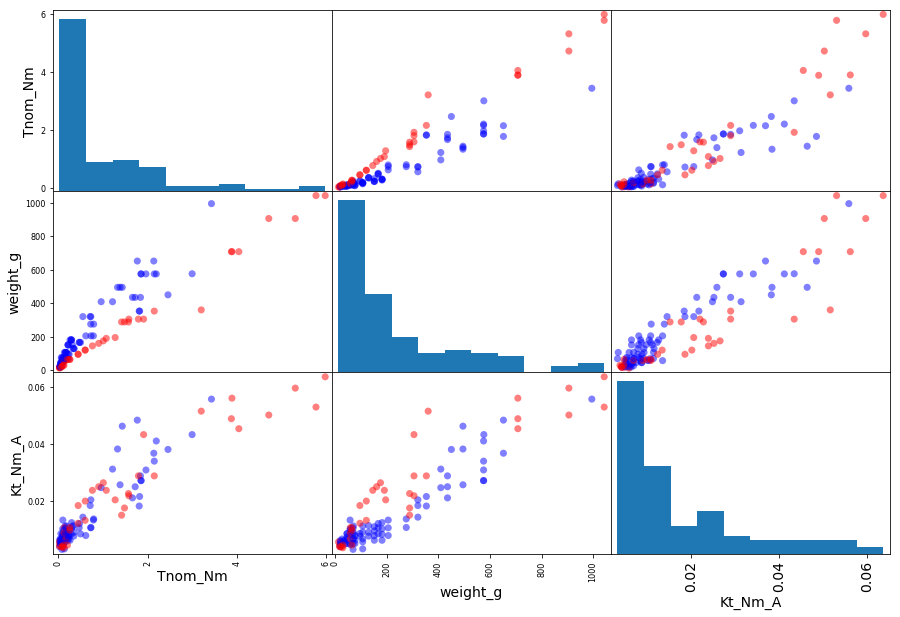

In [40]:
pd.plotting.scatter_matrix(df_mot[['Tnom_Nm','weight_g','Kt_Nm_A']], color=colors, figsize=[15,10], s=200);
plt.tick_params(axis = 'both', labelsize = 14)
plt.rcParams.update({'font.size': 14})

In <span style="color:red">red</span> the dominating points for the criteria of **highest torque and lowest weight**. In <span style="color:blue">blue</span>, the rest of points.

### Filter data based on a selection model

In some cases, it is much more practical to select such values which better fit to the estimation model.
In this visualization, data are sorted depending on their value if greater or lower than the estimation model.

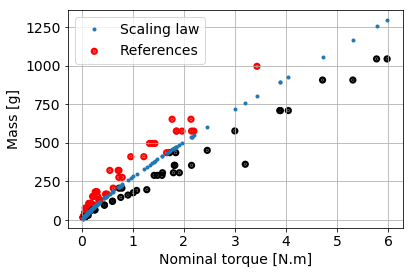

In [41]:
import numpy as np

df=df_mot
Mmot_ref=575 #[g] motor mass reference
Tmot_ref=2.32 #[g] motor torque reference

#Scaling law

df['M*']=Mmot_ref*(df['Tnom_Nm']/Tmot_ref)**(3/3.5) # [kg] Motor mass

#separate values greater or lower than equation
for row in range(len(df_mot['Tnom_Nm'])):
    if (df.loc[row,'weight_g']-df.loc[row,'M*'])<0:
        df.loc[row,'Lower values']=1
    else: df.loc[row,'Lower values']=0
        
color_wheel = {0: 'r', 
               1: 'k'} #we color in red the upper series

colors = df['Lower values'].map(lambda x: color_wheel.get(x))


plt.scatter(df['Tnom_Nm'], df['weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot(df['Tnom_Nm'],df['M*'], '.', label='Scaling law')

# df[df['Lower values']==1].to_csv(r'./Data/Lower-Values-Motors.csv',sep=';')#We save the lower values.
# df[df['Lower values']==0].to_csv(r'./Data/Greater-Values-Motors.csv',sep=';')#We save the greater values.

plt.ylabel('Mass [g]')
plt.xlabel('Nominal torque [N.m]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:red">red</span> we see the data over the scaling law. In **black**, the values under it.

### Get values closer to the estimation model
Two functions are created to select the closest values to the estimation model from below and from above the equation:

**dominated_below** selects those values below the estimation model, which are closest to the estimation model.

In [42]:
def dominated_below(x_,y_,X_,Y_,Y_SL):
    compteur=0
    for a,b,c in zip(X_,Y_,Y_SL):
        #for values greater than SL and high first var and small second var
        if (b-c) <0 and (a<x_) and (b>y_):
            compteur +=1
    return compteur

**dominated_above** selects those values above the estimation model, which are closest to the estimation model.

In [43]:
def dominated_above(x_,y_,X_,Y_,Y_SL):
    compteur=0
    for a,b,c in zip(X_,Y_,Y_SL):
        #for values greater than SL and high first var and small second var
        if (b-c) >0 and (a>x_) and (b<y_):
            compteur +=1
    return compteur

For each value, we plot in red those which are closest to the estimation model and in black the rest of points.

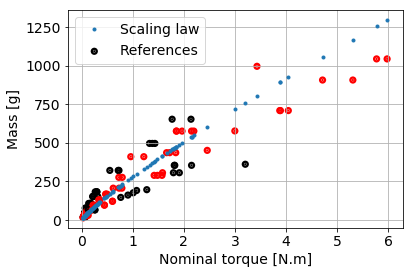

In [44]:
df=df_mot

#Scaling law

df['M*']=Mmot_ref*(df['Tnom_Nm']/Tmot_ref)**(3/3.5) # [kg] Motor mass

#Select closest values to the scaling law
for row in range(len(df_mot['Tnom_Nm'])):
    if dominated_below(df.loc[row,'Tnom_Nm'], df.loc[row,'weight_g'],df['Tnom_Nm'].values,df['weight_g'].values,df['M*'].values)>0:
        df.loc[row,'Dominant closest values']=1  
    elif dominated_above(df.loc[row,'Tnom_Nm'], df.loc[row,'weight_g'],df['Tnom_Nm'].values,df['weight_g'].values,df['M*'].values)>0:
        df.loc[row,'Dominant closest values']=1         
    else: df.loc[row,'Dominant closest values']=0

color_wheel = {0: 'r', 
               1: 'k'} #we color in red the non-dominated series

colors = df['Dominant closest values'].map(lambda x: color_wheel.get(x))

# df[df['Dominant closest values']==0].to_csv(r'./Data/Closest-Values-Motors.csv',sep=';')#We save the closest values.

plt.scatter(df['Tnom_Nm'], df['weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot( df['Tnom_Nm'],df['M*'], '.', label='Scaling law')


plt.ylabel('Mass [g]')
plt.xlabel('Nominal torque [N.m]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:red">red</span> we see the closest values to the scaling law. In **black**, the external values.

### Get the closest lower/upper values to the estimation model
Now, we can be interested in selecting the closest upper /lower values from the selection model

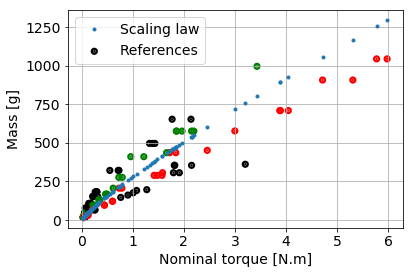

In [45]:
df=df_mot

df['M*']=Mmot_ref*(df['Tnom_Nm']/Tmot_ref)**(3/3.5) # [kg] Motor mass

for row in range(len(df_mot['Tnom_Nm'])):
    if (df.loc[row,'weight_g']-df.loc[row,'M*'])>0:
        if dominated_above(df.loc[row,'Tnom_Nm'], df.loc[row,'weight_g'],df['Tnom_Nm'].values,df['weight_g'].values,df['M*'].values)>0:
            df.loc[row,'Dominant closest values']=0        
        else: df.loc[row,'Dominant closest values']=+1         
    else:
        if dominated_below(df.loc[row,'Tnom_Nm'], df.loc[row,'weight_g'],df['Tnom_Nm'].values,df['weight_g'].values,df['M*'].values)>0:
            df.loc[row,'Dominant closest values']=0        
        else: df.loc[row,'Dominant closest values']=-1         
        
        
color_wheel = {-1: 'r',
               0: 'k',
               1: 'g'} #we color in red the non-dominated series

colors = df['Dominant closest values'].map(lambda x: color_wheel.get(x))

# df[df['Dominant closest values']==-1].to_csv(r'./Data/Closest-Upper-Values-Motors.csv',sep=';')#We save the closest values.
# df[df['Dominant closest values']==1].to_csv(r'./Data/Closest-Lower-Values-Motors.csv',sep=';')#We save the closest values.

plt.scatter(df['Tnom_Nm'], df['weight_g'], c=colors, s=5, linewidth=5,label='References')
plt.plot( df['Tnom_Nm'],df['M*'], '.', label='Scaling law')


plt.ylabel('Mass [g]')
plt.xlabel('Nominal torque [N.m]')
plt.legend()
plt.grid()
plt.show()

In <span style="color:green">green</span> we see the closest values over the scaling law. In <span style="color:red">red</span>, the closest one under it and in **black**, we have the external points.